# Importing Dataset


In [113]:
# وارد کردن کتابخانه‌های مورد نیاز

import pandas as pd
# pandas: برای کار با داده‌های جدولی

import matplotlib.pyplot as plt
# matplotlib: برای رسم نمودارها

import seaborn as sns
# seaborn: برای رسم regplot ,scatterplot ,implot,kdeplot  و نمودارهای آماری

# sklearn: برای استفاده از مدل‌ها و ابزارهای یادگیری ماشین
from sklearn import preprocessing
# preprocessing:  این خط کد بخش مربوط به پردازش و آماده‌سازی داده‌ها را از کتابخانه اسکیت-لرن وارد میکند


from sklearn import metrics
# metrics: این خط کد بخش مربوط به ارزیابی مدل‌های یادگیری ماشین را وارد می‌کند
from sklearn.preprocessing import StandardScaler
# StandardScaler: این خط کد بخش مربوط به استاندارد‌سازی ویژگی‌ها را وارد می‌کند
# استاندارد‌سازی داده‌ها معمولاً قبل از آموزش مدل‌های یادگیری ماشین انجام می‌شود تا تأثیر مقیاس متغیرها کاهش یابد.

from sklearn.model_selection import train_test_split
# train_test_split: این خط کد بخش مربوط به تقسیم‌بندی داده‌ها به آموزش و آزمون را وارد می‌کند


import numpy as np
# NumPy:  برای کار با آرایه‌ها

from tabulate import tabulate
# Tabulate:  برای ایجاد جداول زیبا در خروجی


from sklearn.preprocessing import LabelEncoder  
#  این خط کد مربوط به کتابخانه `sklearn.preprocessing` است.
# `LabelEncoder` یک ابزار برای تبدیل متغیرهای کیفی (categorical) به متغیرهای عددی است.
# این تبدیل به ما کمک می‌کند تا از متغیرهای کیفی در مدل‌های یادگیری ماشین استفاده کنیم.

from sklearn.impute import KNNImputer
 # این خط کد مربوط به کتابخانه `sklearn.impute` است.
 # `KNNImputer` یک ابزار برای پر کردن مقادیر گمشده در داده‌ها است.
 # این ابزار با استفاده از الگوریتم نزدیک‌ترین همسایه‌ها (K-Nearest Neighbors) مقادیر گمشده را تخمین می‌زند.

from sklearn.metrics import mean_squared_error
   # این خطوط کد مربوط به کتابخانه `sklearn.metrics` هستند.
   # این توابع برای ارزیابی مدل‌های رگرسیونی استفاده می‌شوند:
 # `mean_squared_error`: محاسبه میانگین مربع خطا
# `mean_absolute_error`: محاسبه میانگین قدر مطلق خطا
# `r2_score`: محاسبه ضریب تعیین
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy import stats 
   # این خط کد مربوط به کتابخانه `scipy` است.
   # `stats` زیرکتابخانه‌ای در `scipy` است که حاوی ابزارهای آماری مختلف است.
from sklearn.linear_model import LinearRegression
#  این خط کد مربوط به کتابخانه `sklearn.linear_model` است.
#  `LinearRegression` یک ابزار برای ایجاد و آموزش مدل رگرسیون خطی است.
# این کدها در کنار هم می‌توانند برای پیاده‌سازی یک مدل رگرسیونی خطی استفاده شوند.

In [114]:
#import pandas as pd
# pandas: برای کار با داده‌های جدولی
# خواندن فایل CSV
# با استفاده از کاراکتر ";" 
# به عنوان جداکننده
# نتیجه این عملیات در متغیر "df" ذخیره می‌شود.
df = pd.read_csv(r"F:\UNIVERCITY\Term 6\datamining\reression\HousePrice1.csv")

print(df)

       Area  Room  Parking  Warehouse  Elevator             Address  \
0      63.0     1     True       True      True             Shahran   
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3       NaN     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3474   86.0     2     True       True      True  Southern Janatabad   
3475   83.0     2     True       True      True            Niavaran   
3476   75.0     2    False      False     False              Parand   
3477  105.0     2     True       True      True              Dorous   
3478   82.0     2    False       True      True              Parand   

           Price  Price(USD)  
0     1850000000    61666.67  
1     1850000000    61666.67  
2      550000000    18333.33  
3      902500000    300

# Preprocessing

EDA

In [115]:
#مشخص کردن تایپ هر فیچر
df.dtypes

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

In [116]:
#10رکورد اول 
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1850000000,61666.67
1,60.0,1,True,True,True,Shahran,1850000000,61666.67
2,79.0,2,True,True,True,Pardis,550000000,18333.33
3,NaN,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7000000000,233333.33
5,70.0,2,True,True,False,North Program Organization,2050000000,68333.33
6,87.0,2,True,True,True,Pardis,600000000,20000.00
7,59.0,1,True,True,True,Shahran,2150000000,71666.67
8,54.0,2,True,True,False,Andisheh,493000000,16433.33
9,71.0,1,True,True,True,West Ferdows Boulevard,2370000000,79000.00


In [117]:
#10 رکورد آخر
df.tail(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3469,74.0,2,True,True,True,Mehran,4070000000,135666.67
3470,97.0,2,True,True,True,Shahran,2700000000,90000.00
3471,94.0,2,True,True,True,Niavaran,8450000000,281666.67
3472,113.0,3,True,True,True,Ostad Moein,3170000000,105666.67
3473,63.0,1,True,True,False,Feiz Garden,1890000000,63000.00
3474,86.0,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83.0,2,True,True,True,Niavaran,6800000000,226666.67
3476,75.0,2,False,False,False,Parand,365000000,12166.67
3477,105.0,2,True,True,True,Dorous,5600000000,186666.67
3478,82.0,2,False,True,True,Parand,360000000,12000.00


In [118]:
#تعداد سطر و ستون
print('Number of rows:' , len(df)) #rows
print('Number of columns:' , len(df.columns)) #columns

Number of rows: 3479
Number of columns: 8


In [119]:
# محاسبه و چاپ آماره‌های توصیفی برای داده‌فریم df.descibe()
# این آمارها شامل تعداد مشاهدات، میانگین، انحراف معیار، کمینه، بیشینه، و چندک‌ها است
#این اطلاعات به ما کمک می‌کند تا درک بهتری از ساختار و توزیع داده‌های خود داشته باشیم
df.describe()

,Area,Room,Price,Price(USD)
count,3.470000e+03,3479.000000,3.479000e+03,3.479000e+03
mean,8.766678e+06,2.079908,5.359023e+09,1.786341e+05
std,3.171369e+08,0.758275,8.099935e+09,2.699978e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.418250e+09,4.727500e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.200000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


In [120]:
#  محاسبه و چاپ فراوانی مقادیر موجود در ستون 'Area' داده‌فریم df
# این اطلاعات به ما کمک می‌کند تا درک بهتری از توزیع و نحوه پراکندگی داده‌های ما در ستون 'Area' داشته باشیم
# با استفاده از این اطلاعات می‌توانیم تصمیمات بهتری در مورد چگونگی پردازش و مدل‌سازی این ویژگی بگیری
df['Area'].value_counts()

Area
75.0      111
100.0     104
90.0       95
60.0       95
105.0      92
         ... 
312.0       1
221.0       1
1000.0      1
287.0       1
188.0       1
Name: count, Length: 243, dtype: int64

In [121]:
# این کد محاسبه می‌کند که هر ستون در داده‌های `df` چند مقدار منحصر به فرد (unique) دارد
df.nunique()

Area          243
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         934
Price(USD)    932
dtype: int64

In [122]:
#یک توضیح کلی از df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3470 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


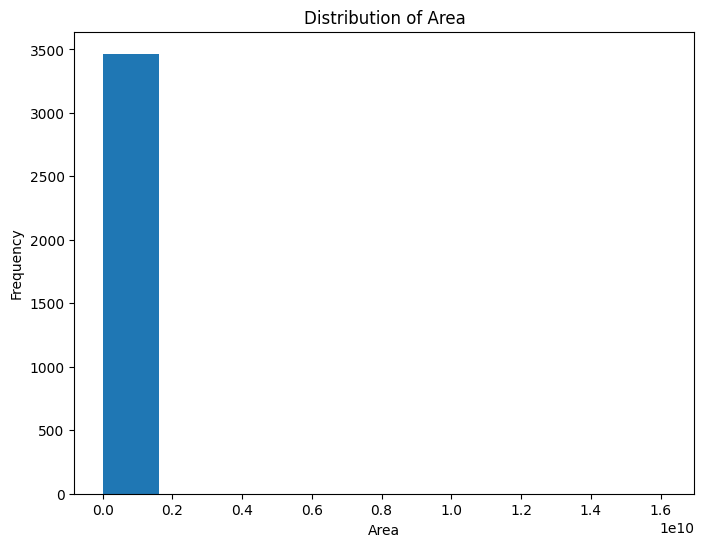

In [123]:
# رسم هیستوگرام برای ستون Area
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم هیستوگرام برای ستون "Area" داده‌فریم df
plt.hist(df["Area"])
# تنظیم برچسب محور افقی به "Area"
plt.xlabel("Area")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Distribution of Area"
plt.title("Distribution of Area")
# نمایش نمودار
plt.show()

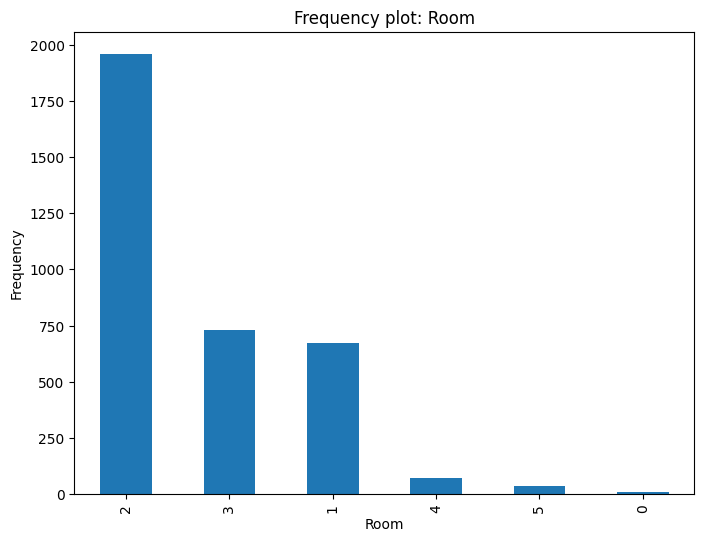

In [124]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Room" داده‌فریم `df`
df["Room"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Room"
plt.xlabel("Room")
# تنظیم برچسب محور عمودی به "Frequency" 
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Room"
plt.title("Frequency plot: Room")
# نمایش نمودار
plt.show()

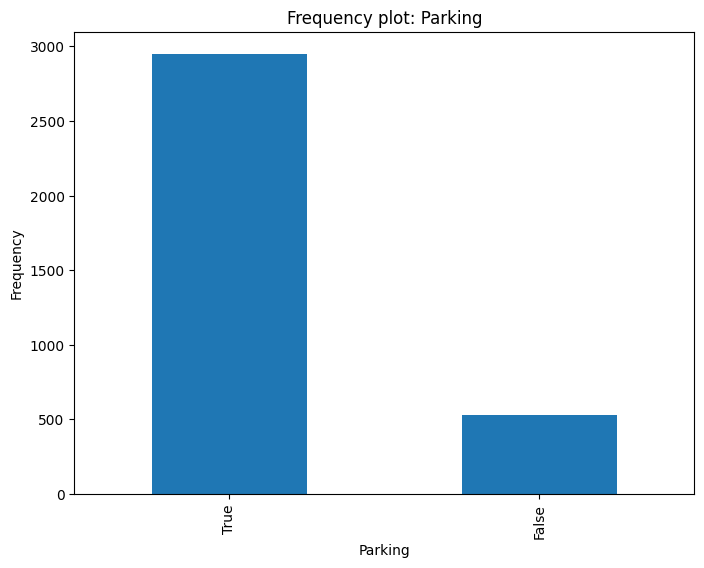

In [125]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Parking" داده‌فریم `df`
df["Parking"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Parking"
plt.xlabel("Parking")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Parking"
plt.title("Frequency plot: Parking")
# نمایش نمودار
plt.show()

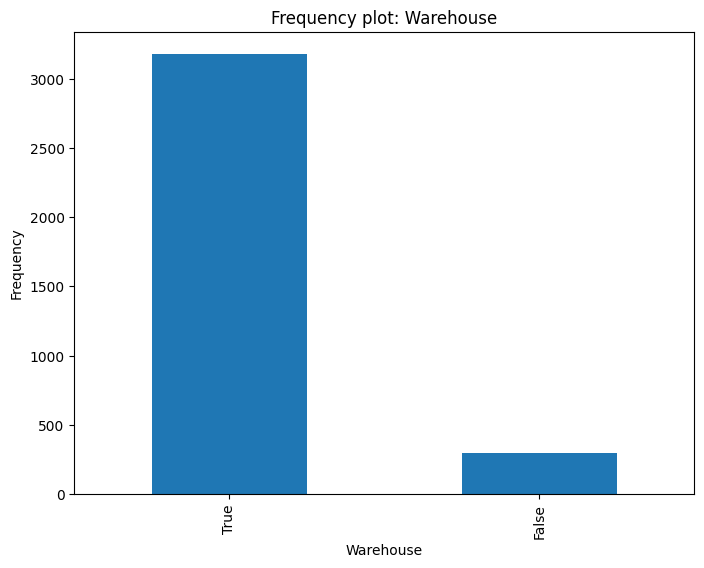

In [126]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Warehouse" داده‌فریم `df`
df["Warehouse"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Warehouse"
plt.xlabel("Warehouse")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Warehouse"
plt.title("Frequency plot: Warehouse")
# نمایش نمودار
plt.show()

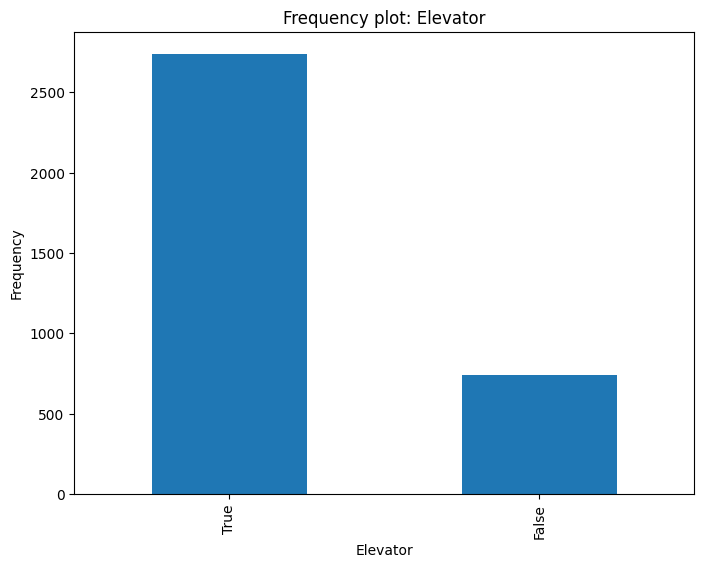

In [127]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Elevator" داده‌فریم `df`
df["Elevator"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Elevator"
plt.xlabel("Elevator")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Elevator"
plt.title("Frequency plot: Elevator")
# نمایش نمودار
plt.show()

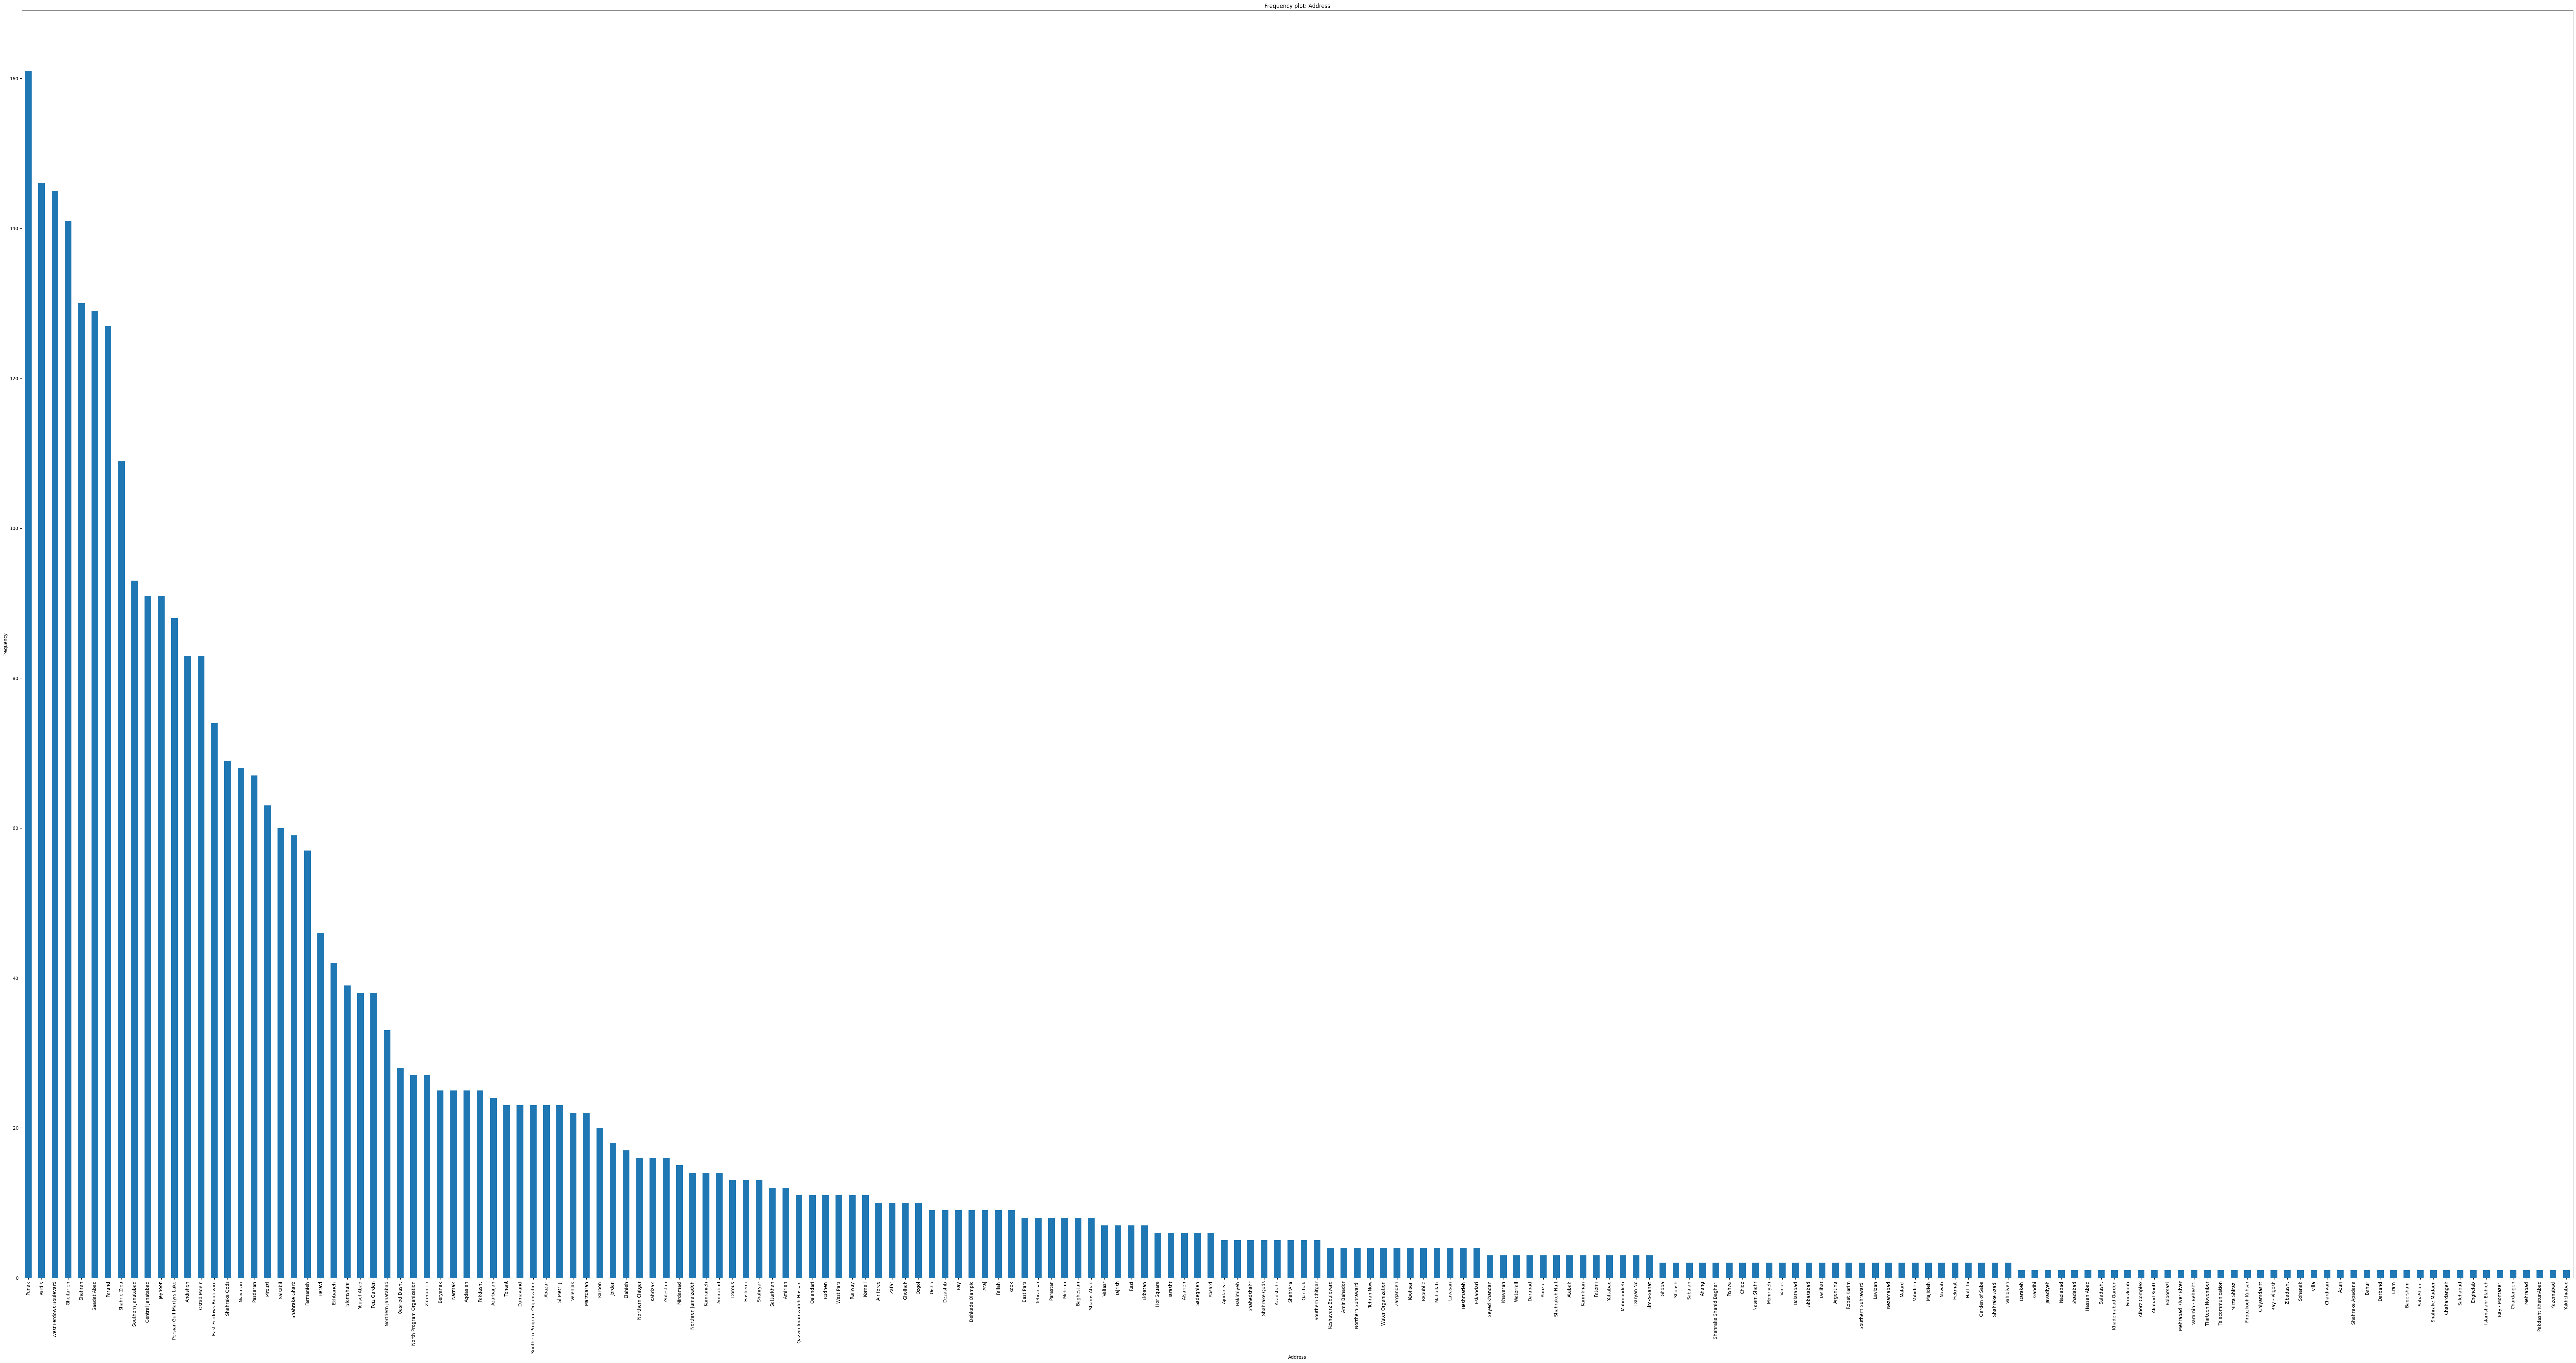

In [128]:
# ایجاد یک شکل (figure) با ابعاد 100 در 50 اینچ
plt.figure(figsize=(100, 50))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Address" داده‌فریم `df`
df["Address"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Address"
plt.xlabel("Address")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Address"
plt.title("Frequency plot: Address")
# نمایش نمودار
plt.show()

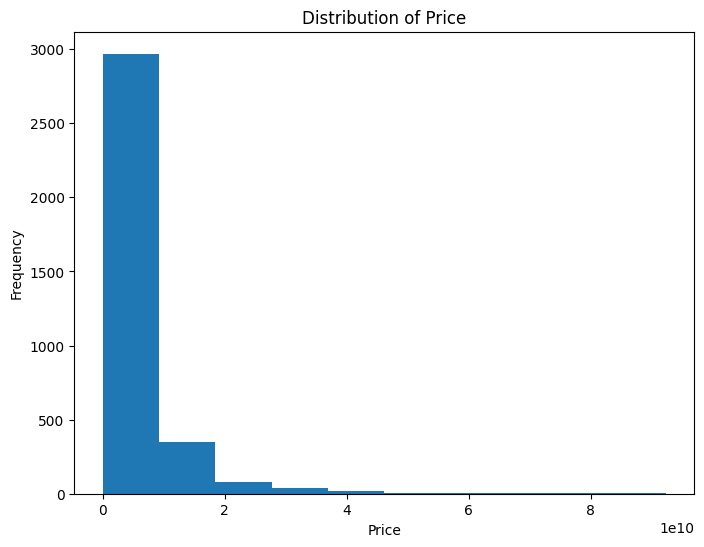

In [129]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار هیستوگرام برای نمایش توزیع مقادیر در ستون "Price" داده‌فریم `df`
plt.hist(df["Price"])
# تنظیم برچسب محور افقی به "Price"
plt.xlabel("Price")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Distribution of Price"
plt.title("Distribution of Price")
# نمایش نمودار
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

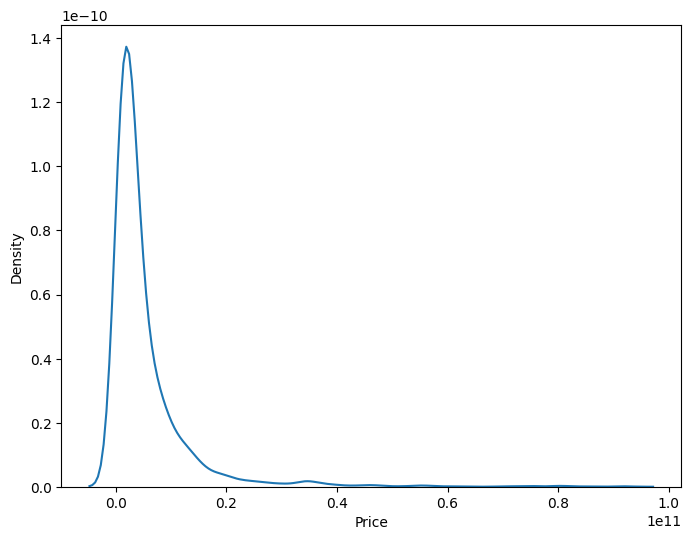

In [130]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار چگالی کرنل (Kernel Density Estimation) برای نمایش توزیع مقادیر در ستون "Price" داده‌فریم `df`
sns.kdeplot(df['Price'])

<Axes: xlabel='Price(USD)', ylabel='Density'>

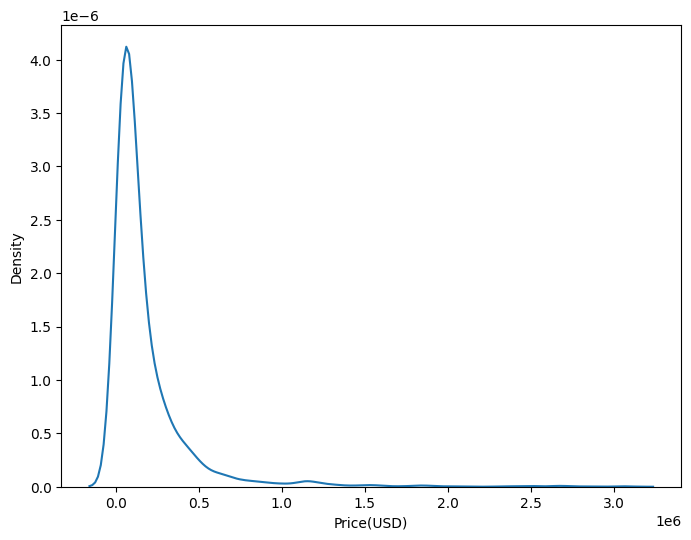

In [131]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار چگالی کرنل (Kernel Density Estimation) برای نمایش توزیع مقادیر در ستون "Price(USD)" داده‌فریم `df`
sns.kdeplot(df['Price(USD)'])

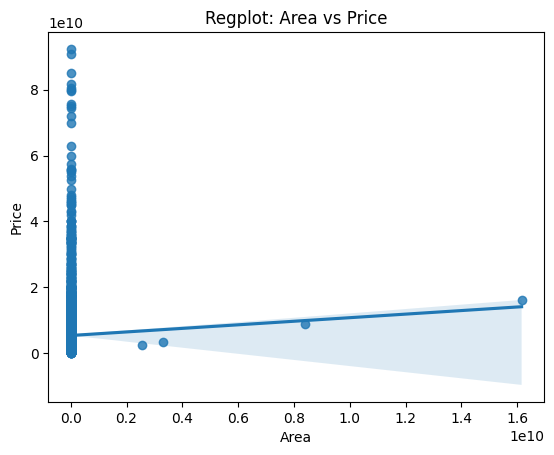

In [132]:
# رسم نمودار پراکنش (scatter plot) همراه با خط رگرسیون برای بررسی رابطه بین متغیرهای "Area" و "Price" در داده‌فریم `df`
sns.regplot(data=df, x="Area", y="Price")
# تنظیم عنوان نمودار به "Regplot: Area vs Price"
plt.title('Regplot: Area vs Price') 
# نمایش نمودار
plt.show() 

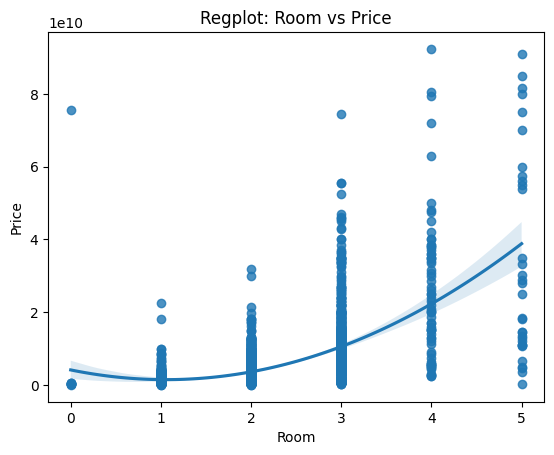

In [133]:
# رسم نمودار پراکنش (scatter plot) همراه با خط رگرسیون درجه دوم برای بررسی رابطه بین متغیرهای "Room" و "Price" در داده‌فریم `df`
sns.regplot(data=df, x="Room", y="Price",order=2)
# تنظیم عنوان نمودار به "Regplot: Room vs Price"
plt.title('Regplot: Room vs Price') 
# نمایش نمودار
plt.show() 

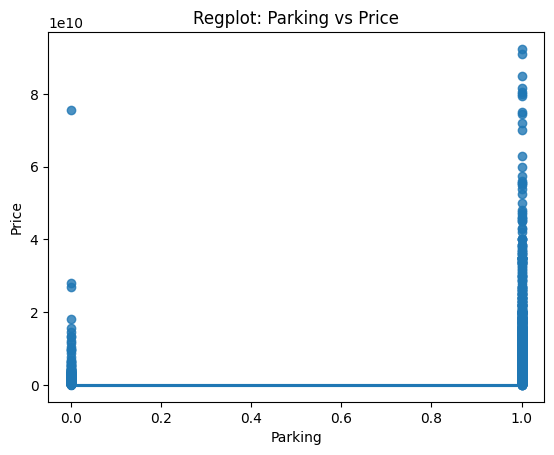

In [134]:
# رسم نمودار پراکنش (scatter plot) همراه با خط رگرسیون لجستیک برای بررسی رابطه بین متغیرهای "Parking" و "Price" در داده‌فریم `df`
sns.regplot(data=df, x="Parking", y="Price", logistic=True)
# تنظیم عنوان نمودار به "Regplot: Parking vs Price"
plt.title('Regplot: Parking vs Price') 
# نمایش نمودار
plt.show() 

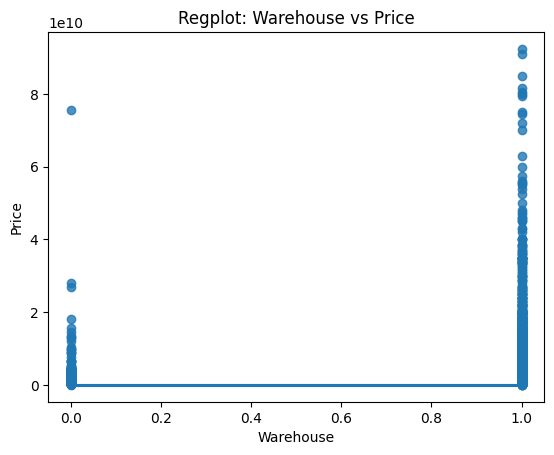

In [135]:
# sns.regplot: تابعی از کتابخانه Seaborn برای رسم نمودار رگرسیون است.
# data=df: DataFrame حاوی داده‌ها را مشخص می‌کند.
# x="Warehouse": ستون را به عنوان متغیر مستقل (محور x) تعیین می‌کند.
# y="Price": ستون را به عنوان متغیر وابسته (محور y) تعیین می‌کند.
# logistic=True: نوع رگرسیون را به "رگرسیون لجستیک" تنظیم می‌کند.
sns.regplot(data=df, x="Warehouse", y="Price", logistic=True)
# تنظیم عنوان نمودار به "Regplot: Warehouse vs Price"
plt.title('Regplot: Warehouse vs Price') 
# نمایش نمودار
plt.show() 

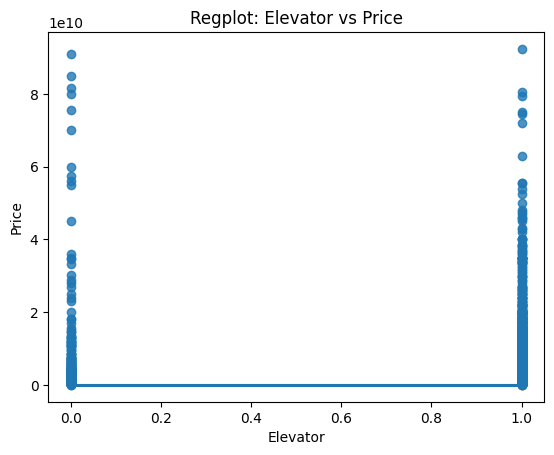

In [136]:
# sns.regplot: تابعی از کتابخانه Seaborn برای رسم نمودار رگرسیون است.
# data=df: DataFrame حاوی داده‌ها را مشخص می‌کند.
# x="Elevator": ستون را به عنوان متغیر مستقل (محور x) تعیین می‌کند.
# y="Price": ستون را به عنوان متغیر وابسته (محور y) تعیین می‌کند.
# logistic=True: نوع رگرسیون را به "رگرسیون لجستیک" تنظیم می‌کند.
sns.regplot(data=df, x="Elevator", y="Price", logistic=True)
# تنظیم عنوان نمودار به "Regplot: Elevator vs Price"
plt.title('Regplot: Elevator vs Price') 
# نمایش نمودار
plt.show() 

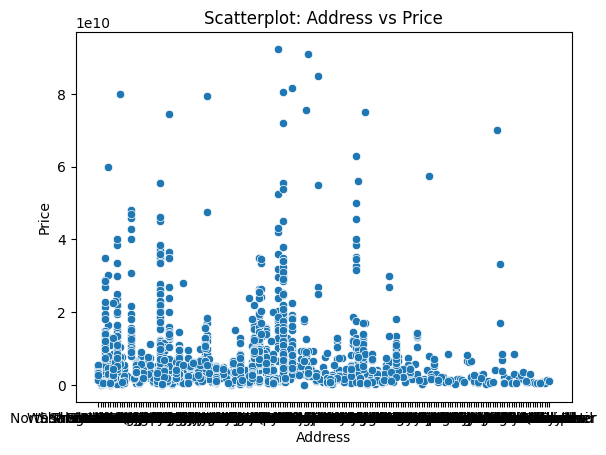

'\ndf[\'Address_numeric\'] = pd.to_numeric(df[\'Address\'], errors=\'coerce\')\nsns.regplot(data=df, x="Address_numeric", y="Price", logistic=True)\nplt.title(\'Regplot: Address vs Price\')\nplt.show()\n\nsns.lmplot(data=df, x="Address", y="Price", logistic=True)\nplt.title(\'Regplot: Address vs Price\')\nplt.show()\n\nsns.regplot(data=df, x="Address", y="Price", logistic=True)\nplt.title(\'Regplot: Address vs Price\') \nplt.show()\n'

In [137]:
# sns.scatterplot: تابعی از کتابخانه Seaborn برای رسم نمودار پراکندگی است.
# data=df: DataFrame حاوی داده‌ها را مشخص می‌کند.
# x="Address": ستون را به عنوان متغیر مستقل (محور x) تعیین می‌کند.
# y="Price": ستون را به عنوان متغیر وابسته (محور y) تعیین می‌کند.
sns.scatterplot(data=df, x="Address", y="Price")
# plt.title: عنوان نمودار را با متن "Scatterplot: Address vs Price" تنظیم می‌کند.
plt.title('Scatterplot: Address vs Price')
# نمایش نمودار
plt.show()

'''
df['Address_numeric'] = pd.to_numeric(df['Address'], errors='coerce')
sns.regplot(data=df, x="Address_numeric", y="Price", logistic=True)
plt.title('Regplot: Address vs Price')
plt.show()

sns.lmplot(data=df, x="Address", y="Price", logistic=True)
plt.title('Regplot: Address vs Price')
plt.show()

sns.regplot(data=df, x="Address", y="Price", logistic=True)
plt.title('Regplot: Address vs Price') 
plt.show()
'''

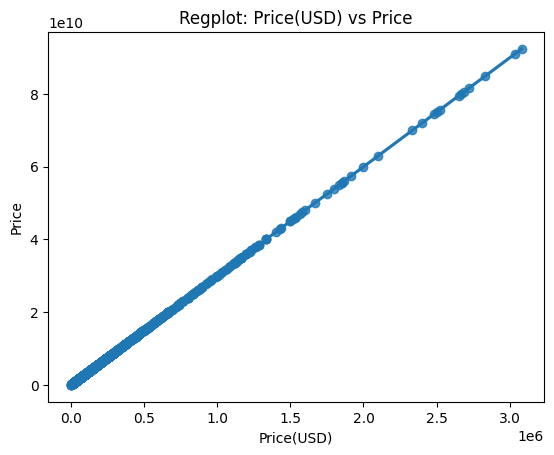

In [138]:
# sns.regplot: تابعی از کتابخانه Seaborn برای رسم نمودار رگرسیون است.
# data=df: DataFrame حاوی داده‌ها را مشخص می‌کند.
# x="Price(USD)": ستون را به عنوان متغیر مستقل (محور x) تعیین می‌کند.
# y="Price": ستون را به عنوان متغیر وابسته (محور y) تعیین می‌کند.
# order=2: درجه رگرسیون را به 2 تنظیم می‌کند.
sns.regplot(data=df, x="Price(USD)", y="Price",order=2)
# plt.title: عنوان نمودار را با متن "Regplot: Price(USD) vs Price" تنظیم می‌کند.
plt.title('Regplot: Price(USD) vs Price') 
# نمایش نمودار
plt.show() 

# Data Cleaning

In [139]:
#جمع مقادیر خالی یا  null هر فیچر
print(df.isna().sum())
print('--------------------------------')
#جمع مقادیر تکراری یا  duplicate هر فیچر
print(df.duplicated().sum())


Area           9
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64
--------------------------------
207


In [140]:
# حذف ردیف‌های تکراری از DataFrame
df = df.drop_duplicates()
# تابع drop_duplicates() برای حذف ردیف‌های تکراری از DataFrame استفاده می‌شود و DataFrame پاکسازی شده را بازمی‌گرداند.
print(len(df))
# تابع len() تعداد عناصر را برمی‌گرداند. اینجا تعداد ردیف‌های DataFrame پس از حذف تکرارها چاپ می‌شود.
print(df.duplicated().sum())
# تابع duplicated() برای یافتن ردیف‌های تکراری در DataFrame استفاده می‌شود. سپس با استفاده از sum()، تعداد ردیف‌های تکراری چاپ می‌شود.


3272
0


In [141]:
# ایجاد یک نمونه از کلاس LabelEncoder برای تبدیل مقادیر دسته‌بندی به اعداد
encoder = LabelEncoder() 
# تبدیل ستون 'Parking' از مقادیر دسته‌بندی به اعداد
df['Parking']= encoder.fit_transform(df['Parking'])

# تبدیل ستون 'Warehouse' از مقادیر دسته‌بندی به اعداد
df['Warehouse']= encoder.fit_transform(df['Warehouse'])

# تبدیل ستون 'Elevator' از مقادیر دسته‌بندی به اعداد
df['Elevator']= encoder.fit_transform(df['Elevator'])

# تبدیل ستون 'Address' به اعداد با استفاده از LabelEncoder و ذخیره نتایج در ستون 'Address_Encoded'
df['Address_Encoded'] = encoder.fit_transform(df['Address']) 

# Drop the original 'Address' column 
# حذف ستون اصلی 'Address' از DataFrame
df.drop('Address', axis=1, inplace=True) 
# Drop rows with missing values in 'Address' column 
# حذف ردیف‌های دارای مقادیر ناپذیرفتنی در ستون 'Address_Encoded' از DataFrame
df.dropna(subset=['Address_Encoded'], inplace=True)


In [142]:
# با استفاده از مقادیر موجود در دیتاست و بر اساس شباهت‌های میان مقادیر موجود، برای هر مقدار ناپذیرفتنی، مقداری را جایگزین می‌کند که مشابه‌ترین مقادیر موجود به آن مقدار ناپذیرفتنی باشد.
# این روش می‌تواند مفید باشد زمانی که مقادیر missing در دیتاست به صورت پراکنده و در نقاط مختلف باشند و می‌توانند با استفاده از مقادیر موجود در دیتاست تخمین زده شوند.
#from sklearn.impute import KNNImputer 
# Create a KNN Imputer with n_neighbors=5 
# ایجاد یک نمونه از کلاس KNNImputer با n_neighbors=5

imputer = KNNImputer(n_neighbors=5) 
 
# تعیین ستون‌های عددی که مقادیر ناپذیرفتنی باید جایگزین شوند
# Impute missing values in numerical columns 
numerical_columns = ['Area', 'Room', 'Price', 'Price(USD)'] 

# جایگزینی مقادیر ناپذیرفتنی در ستون‌های عددی با استفاده از روش KNNImputer
imputed_data = imputer.fit_transform(df[numerical_columns]) 

# جایگزینی مقادیر ناپذیرفتنی در داده اصلی DataFrame با مقادیر تکمیل‌شده
# Replace missing values in the original DataFrame 
df[numerical_columns] = imputed_data 

In [143]:
# محاسبه z-score برای هر ستون در هر گروه
d_f = df 
# کد یک کپی از DataFrame اصلی ایجاد می‌کند و آن را در d_f ذخیره می‌کند.
# حلقه for هر ستون در DataFrame را طی می‌کند.
# برای هر ستون، یک ستون جدید با نام {col}_z_score ایجاد می‌شود که حاوی z-score برای مقادیر آن ستون است.
# stats.zscore(df[f'{col}']) تابعی است که z-score برای هر مقدار در ستون col را محاسبه می‌کند.
# d_f[f'{col}_z_score_AR'] = df.groupby('Area')['Room'].transform(stats.zscore) محاسبه z-score برای ستون Room را نسبت به گروه Area انجام می‌دهد.
# df.groupby('Area'): گروه بندی بر اساس ستون Area
# ['Room']: انتخاب ستون Room برای محاسبه z-score
# transform(stats.zscore): محاسبه z-score برای هر مقدار در گروه با استفاده از تابع stats.zscore
for col in df.columns:
    d_f[f'{col}_z_score'] = stats.zscore(df[f'{col}'])
    d_f[f'{col}_z_score_AR'] = df.groupby('Area')['Room'].transform(stats.zscore)
    #d_f[f'{col}_z_score_AP'] = df.groupby('Area')[['Price']].transform(stats.zscore)
    #d_f[f'{col}_z_score_RP'] = df.groupby('Room')[['Price']].transform(stats.zscore)

df = d_f    
# متغیر threshold مقدار آستانه‌ای را برای شناسایی outlier ها (برون‌دادها) تعریف می‌کند.
# هر مقداری که z-score آن مطلقا (مقدار بدون علامت) بزرگتر از threshold باشد، به عنوان outlier در نظر گرفته می‌شود.
threshold = 2
# شناسایی Outlier هاoutliers = df.loc[(df.filter(like='_z_score').abs() > threshold).any(axis=1)]
# حذف Outlier ها
#df_clean = df.loc[~(df.filter(like='_z_score').abs() > threshold).any(axis=1)]
# df.filter(like='_z_score'): زیرمجموعه‌ای از DataFrame را انتخاب می‌کند که نام ستون‌های آن با _z_score ختم می‌شود (ستون‌های حاوی z-score).
# .abs(): مقدار مطلق (بدون علامت) هر مقدار در ستون‌های z-score را محاسبه می‌کند.
#  threshold: مقادیر مطلق z-score را با آستانه مقایسه می‌کند.
# .any(axis=1): بررسی می‌کند که آیا در هر سطر (ردیف) حداقل یک مقدار z-score وجود دارد که از آستانه عبور کند.
# df.loc[...]: بر اساس شرط قبلی، سطرهایی را که حاوی outlier هستند انتخاب می‌کند و در outliers ذخیره می‌کند.
outliers = df.loc[(df.filter(like='_z_score').abs() > threshold).any(axis=1)] 
outliers = outliers.loc[~(df.filter(like='_z_score_AR').abs() < threshold).any(axis=1)] 
#outliers = outliers.loc[~(df.filter(like='_z_score_AP').abs() < threshold).any(axis=1)] 
#outliers = outliers.loc[~(df.filter(like='_z_score_RP').abs() < threshold).any(axis=1)] 

# ~df.index.isin(outliers.index): سطرهایی را که در DataFrame اصلی (df) وجود دارند و در outliers (ردیف‌های outlier) نیستند را انتخاب می‌کند (عملگر تیلده (~) برای نقیض گرفتن است).
# df.loc[...]: بر اساس شرط قبلی، سطرهایی را که outlier نیستند انتخاب کرده و در df_clean ذخیره می‌کند.
# این کار outlier ها را از DataFrame اصلی حذف نمی‌کند، بلکه یک DataFrame جدید بدون outlier ها ایجاد می‌کند.
df_clean = df.loc[~df.index.isin(outliers.index)]

# حلقه for لیستی از ستون‌ها را طی می‌کند.
# برای هر ستون در لیست، دو ستون با پسوند _z_score و _z_score_AR حذف می‌شوند.
# axis=1 نشان می‌دهد که حذف بر اساس
for col in ['Area','Room','Parking','Warehouse','Elevator','Address_Encoded','Price','Price(USD)' ]:
    df_clean = df_clean.drop([f'{col}_z_score'], axis=1)
    df_clean = df_clean.drop([f'{col}_z_score_AR'], axis=1)
    #df_clean = df_clean.drop([f'{col}_z_score_AP'], axis=1)
    #df_clean = df_clean.drop([f'{col}_z_score_RP'], axis=1)

df = df_clean
# چاپ تعداد ردیف های اصلی و تعداد ردیف های حذف شدهprint(f"Original DataFrame Shape: {df.shape}")
print(outliers)
print(df)
print(f"Cleaned DataFrame Shape: {df_clean.shape}")

       Area  Room  Parking  Warehouse  Elevator         Price  Price(USD)  \
8      54.0   2.0        1          1         0  4.930000e+08    16433.33   
9      71.0   1.0        1          1         1  2.370000e+09    79000.00   
19     42.0   1.0        0          1         0  1.390000e+09    46333.33   
47    113.0   3.0        1          1         0  7.000000e+09   233333.33   
70     90.0   1.0        0          1         0  8.500000e+08    28333.33   
...     ...   ...      ...        ...       ...           ...         ...   
3431   86.0   3.0        0          1         1  2.750000e+08     9166.67   
3435   54.0   0.0        0          0         0  4.700000e+08    15666.67   
3464   94.0   2.0        0          1         1  5.950000e+08    19833.33   
3472  113.0   3.0        1          1         1  3.170000e+09   105666.67   
3478   82.0   2.0        0          1         1  3.600000e+08    12000.00   

      Address_Encoded  Area_z_score  Area_z_score_AR  ...  Warehouse_z_scor

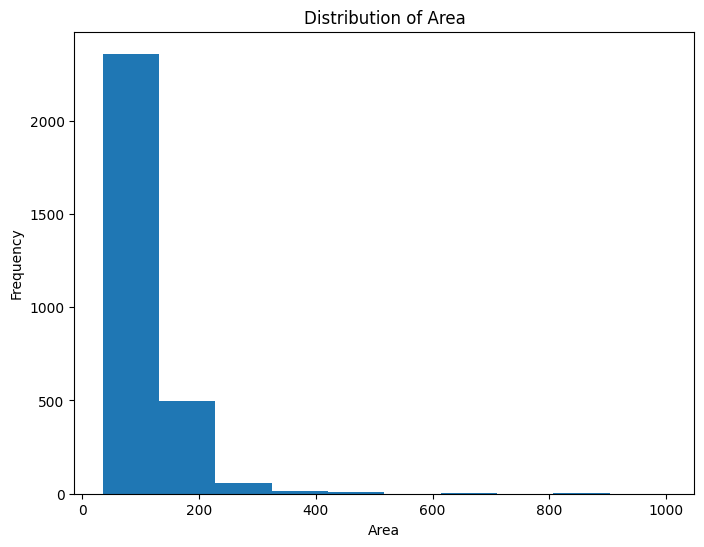

In [144]:
# رسم هیستوگرام برای ستون Area
plt.figure(figsize=(8, 6))
plt.hist(df["Area"])
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.title("Distribution of Area")
plt.show()

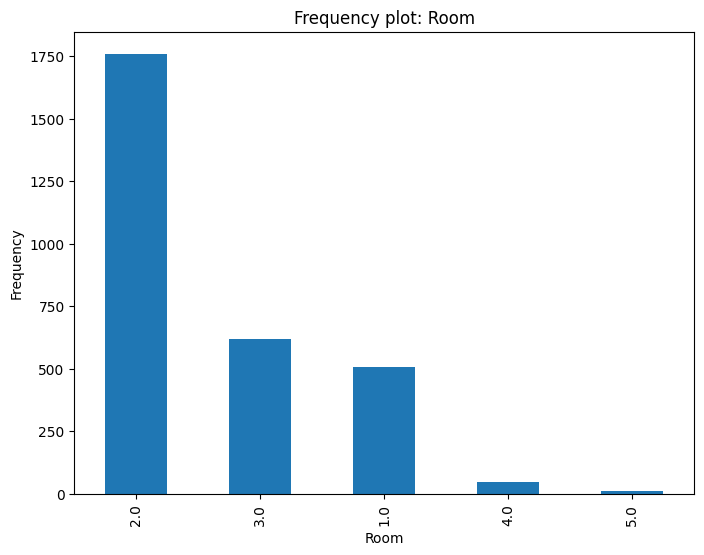

In [145]:
plt.figure(figsize=(8, 6))
# نمودار میله‌ای
df["Room"].value_counts().plot(kind="bar")
plt.xlabel("Room")
plt.ylabel("Frequency")
plt.title("Frequency plot: Room")
plt.show()

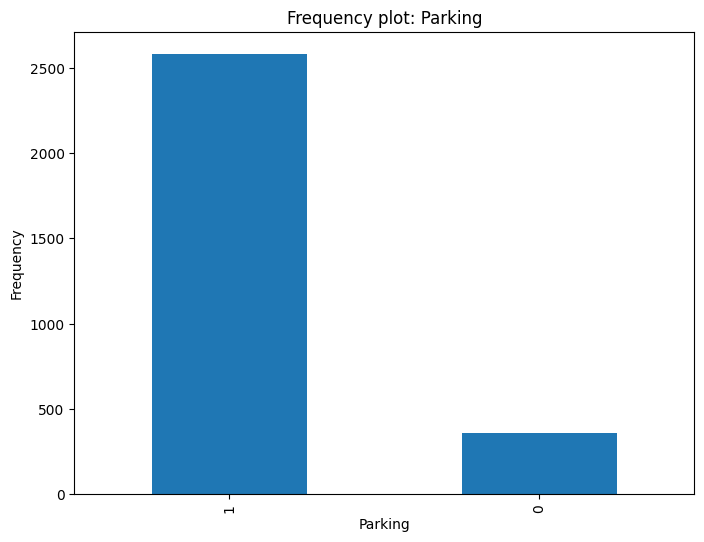

In [146]:
plt.figure(figsize=(8, 6))
# نمودار میله‌ای
df["Parking"].value_counts().plot(kind="bar")
plt.xlabel("Parking")
plt.ylabel("Frequency")
plt.title("Frequency plot: Parking")
plt.show()

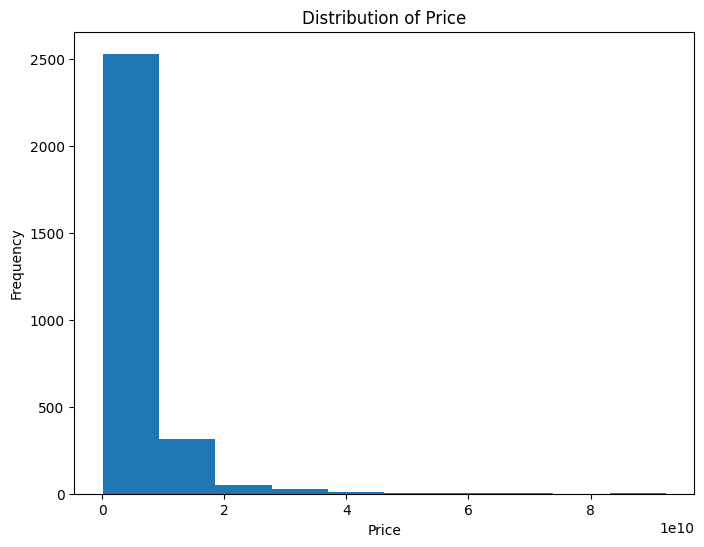

In [147]:
# رسم هیستوگرام برای ستون Area
plt.figure(figsize=(8, 6))
plt.hist(df["Price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")
plt.show()

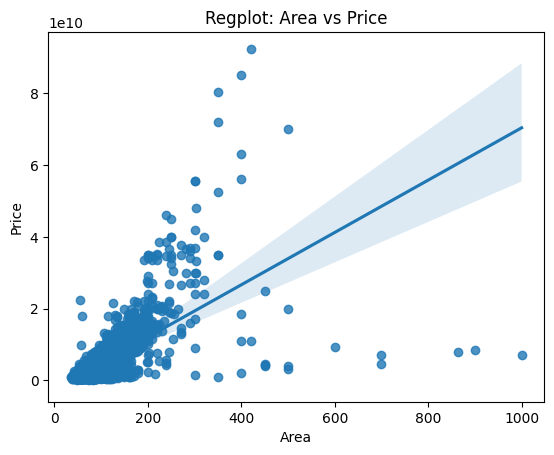

In [148]:
sns.regplot(data=df, x="Area", y="Price")
#sns.regplot(data=df, x="Price", y="Area")
plt.title('Regplot: Area vs Price') 
plt.show() 

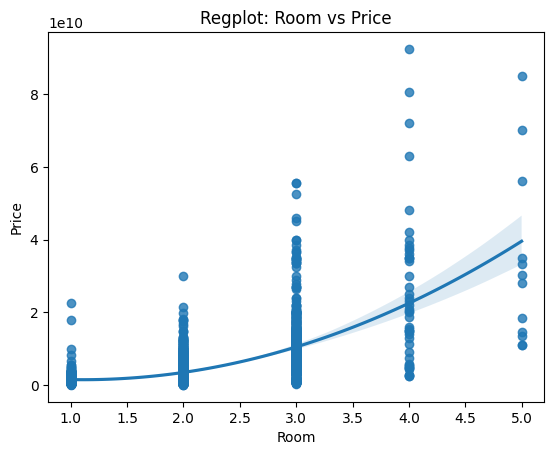

In [149]:
sns.regplot(data=df, x="Room", y="Price",order=2)
plt.title('Regplot: Room vs Price') 
plt.show() 

# Data Normalization

In [150]:
# جدا کردن ویژگی‌ها و برچسب‌ها
#در واقع برای اینکه بتوان راحت تر نرمال سازی و بعد جدا کردن قسمت آزمون از آموزش را انجام داد ابتدا فیچرها را از لیبل جدا می کنیم
# ابتدا لیببل یا همان کاردیو به عنوان ستون تارگت حذف شده و نتیجه در فیچر ها ذخیره میشود
#در متن های مربوط به پردازش داده‌ها و آماده سازی آنها برای مدل‌های یادگیری ماشینی، استفاده از پارامتر `axis=1` معمولا به معنای انجام عملیات روی ستون‌ها (features) است.
#بنابراین، axis=1 به معنای عملیات روی ستون‌ها (features) و axis=0 به معنای عملیات روی ردیف‌ها (نمونه‌ها) است.
#default : axis=0

features = df.drop(['Price', 'Price(USD)'], axis=1)

# در اینجا ستون هدف در دیتا فریم در متغیر لیبل ذخیره میشود

labels = df[['Price', 'Price(USD)']]



In [151]:
# from sklearn.preprocessing import StandardScaler
# در این خط، یک شی `scaler` 
# از کلاس StandardScaler 
# ایجاد می‌شود.
# این شی برای استاندارد‌سازی ویژگی‌ها استفاده خواهد شد.

#from tabulate import tabulate
# Tabulate:  برای ایجاد جداول زیبا در خروجی

scaler = StandardScaler()

# در این خط، ویژگی‌ها (`features`)
# به روش استاندارد‌سازی توسط `scaler` 
#تبدیل می‌شوند. نتیجه در متغیر 
#`normal_df` ذخیره می‌شود.
normal_df = scaler.fit_transform(features)
# در این خط، مقادیر استاندارد‌شده ویژگی‌ها در متغیر `normal_df` چاپ می‌شوند.
print(normal_df)
print('----------------------------------------------------------------------------------------------------------------')
# در این خط، مقادیر استاندارد‌شده فیچرز در قالب یک جدول با استفاده از تابع `tabulate` چاپ می‌شوند.
# `tabulate` یک تابع در کتابخانه `tabulate` 
# است که به شما امکان می‌دهد داده‌ها را در قالب جدول چاپ کنید.
# پارامترهای `headers` 
# تعیین می‌کنند که هر ستون با چه عنوانی نمایش داده شود

print(tabulate(normal_df, headers= ['Area','Room','Parking','Warehouse','Elevator','Address','Price','Price(USD)' ]) )

[[-0.68837322 -1.56921716  0.37325445  0.26413527  0.48573263  0.97990465]
 [-0.73766032 -1.56921716  0.37325445  0.26413527  0.48573263  0.97990465]
 [-0.42550866 -0.1182827   0.37325445  0.26413527  0.48573263  0.21203178]
 ...
 [-0.31050541 -0.1182827   0.37325445  0.26413527  0.48573263  1.11772799]
 [-0.35979252 -0.1182827   0.37325445  0.26413527  0.48573263 -0.02423679]
 [ 0.00164625 -0.1182827   0.37325445  0.26413527  0.48573263 -1.32371395]]
----------------------------------------------------------------------------------------------------------------
       Area       Room    Parking    Warehouse    Elevator      Address
-----------  ---------  ---------  -----------  ----------  -----------
-0.688373    -1.56922    0.373254     0.264135    0.485733   0.979905
-0.73766     -1.56922    0.373254     0.264135    0.485733   0.979905
-0.425509    -0.118283   0.373254     0.264135    0.485733   0.212032
-0.655515    -0.118283   0.373254     0.264135    0.485733   0.901148
 0.2973

# Splitting the data

In [152]:

x=df[['Area','Room','Parking','Warehouse','Elevator','Address_Encoded']]
y=df[['Price','Price(USD)']]
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# نمایش اندازه قسمت‌ها
print("Training set shape :", x_train.shape , y_train.shape)
print("Training set shape :", x_test.shape , y_test.shape)
# در این دو خط، تعداد نمونه‌های موجود در مجموعه آموزش و آزمون چاپ می‌شود

Training set shape : (2060, 6) (2060, 2)
Training set shape : (884, 6) (884, 2)


# Fitting

In [153]:
# Import necessary libraries
# وارد کردن کتابخانه لازم برای رگرسیون خطی
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
# ایجاد و تناسب دادن مدل رگرسیون خطی
model = LinearRegression()
# ایجاد یک نمونه از مدل رگرسیون خطی
# ایجاد یک نمونه از کلاس LinearRegression.
model.fit(x_train, y_train)
# آموزش مدل با استفاده از داده‌های آموزشی
# داده‌های ورودی x و متغیرهای هدف y.

# Get the intercept and coefficient values
# گرفتن مقدارهای عرض از مبدا (intercept) و ضریب‌ها (coefficients) مدل
intercept = model.intercept_
# دریافت مقدار عرض از مبدا (intercept) مدل
# مقدار عرض از مبدا (intercept) مدل را باز می‌گرداند.
coefficients = model.coef_
# دریافت مقدار ضریب‌های (coefficients) مدل
# مقدار ضریب‌های (coefficients) مدل را باز می‌گرداند.


# Print the results
print("Intercept:", intercept)
# چاپ مقدار عرض از مبدا (intercept)
#که نشان می‌دهد مقدار پیش‌بینی شده
#y
#چقدر است وقتی تمام متغیرهای مستقل برابر صفر باشند.
print("Coefficients:", coefficients)


Intercept: [-7.27237843e+09 -2.42412614e+05]
Coefficients: [[ 5.48005541e+07  2.48651068e+09 -6.54324146e+05  7.58856484e+08
   8.40337582e+08  6.07702076e+05]
 [ 1.82668513e+03  8.28836895e+04 -2.18110898e+01  2.52952159e+04
   2.80112527e+04  2.02567365e+01]]


# Evaluation

In [154]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# پیش‌بینی مقادیر برای داده‌های آزمایش
# پیش‌بینی مقادیر y با استفاده از مدل آموزش داده شده و داده‌های تست
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
# پارامتر squared=False برای محاسبه RMSE استفاده می‌شود.
# محاسبه rmse 
#با تنظیم squared=False 
#که مربع mse 
#را محاسبه نمی‌کند
print("Root Mean Squared Error:", rmse)
# این معیار بین 0 تا 1 قرار دارد و هرچه به 1 نزدیک‌تر باشد، نشان‌دهنده برازش بهتر مدل است
r2 = r2_score(y_test, y_pred)
# محاسبه r2_score بین مقادیر واقعی y_test و مقادیر پیش‌بینی شده y_pred
#  نشان می‌دهد چه درصدی از تغییرات متغیر وابسته توسط مدل توضیح داده شده است.
print("R-squared:", r2)
# چاپ مقدار r2_score



mae = mean_absolute_error(y_test, y_pred)
# محاسبه mae بین مقادیر واقعی y_test و مقادیر پیش‌بینی شده y_pred
# میانگین مطلق اختلافات بین مقادیر واقعی (y_true) و مقادیر پیش‌بینی شده (y_pred) است.
print("Mean Absolute Error:", mae)
# چاپ مقدار mae



Mean Squared Error: 9.40983148318283e+18
Root Mean Squared Error: 2169154075.3575954
R-squared: 0.47896866544178246
Mean Absolute Error: 1264337980.4359791


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
